In [52]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv("../data/valencia_sale.csv")

variables = [
    "PRICE",
    "CONSTRUCTEDAREA",
    "ROOMNUMBER",
    "BATHNUMBER",
    "AGE",
    "DISTANCE_TO_CITY_CENTER",
    "DISTANCE_TO_METRO",
    "DISTANCE_TO_BLASCO",
    "CADASTRALQUALITYID"
]

df_clean = df.dropna(subset=variables + ["LATITUDE", "LONGITUDE"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[variables])

kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["CLUSTER"] = kmeans.fit_predict(X_scaled)
df_clean["Cluster"] = df_clean["CLUSTER"].astype(str)  

df_clean.to_csv("../data/valencia_sale_clustered.csv", index=False)

print("Archivo guardado como 'valencia_sale_clustered.csv'")

Archivo guardado como 'valencia_sale_clustered.csv'


In [53]:
df = pd.read_csv("../data/valencia_sale_clustered.csv")
df["Cluster"] = df["CLUSTER"].astype(str)

fig = px.scatter_mapbox(
    df,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="Cluster",
    zoom=12,
    height=700,
    mapbox_style="carto-positron",
    title="Distribución Geográfica de Inmuebles por Clúster"
)

fig.show()

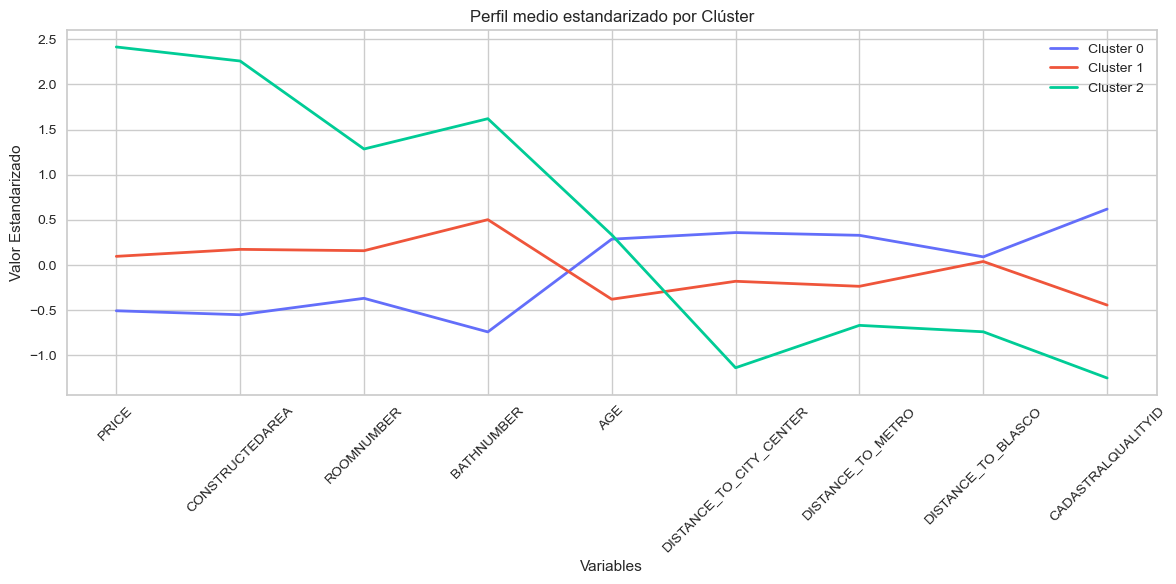

In [54]:
df = pd.read_csv("../data/valencia_sale_clustered.csv")

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[variables]), columns=variables)
df_scaled["Cluster"] = df["CLUSTER"]

mean_profiles = df_scaled.groupby("Cluster").mean()

cluster_colors = {
    0: "#636EFA",  # azul
    1: "#EF553B",  # rojo
    2: "#00CC96"
}

plt.figure(figsize=(12, 6))
for cluster_id, row in mean_profiles.iterrows():
    plt.plot(
        row.values,
        label=f"Cluster {cluster_id}",
        linewidth=2,
        color=cluster_colors.get(cluster_id, "gray")
    )
plt.xticks(ticks=range(len(variables)), labels=variables, rotation=45)
plt.title("Perfil medio estandarizado por Clúster")
plt.xlabel("Variables")
plt.ylabel("Valor Estandarizado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
